# CS229: Problem Set 2
## Problem 1: Logistic Regression - Training Stability 


**C. Combier**

This iPython Notebook provides solutions to Stanford's CS229 (Machine Learning, Fall 2017) graduate course problem set 2, taught by Andrew Ng.

The problem set can be found here: [./ps2.pdf](ps2.pdf)

I chose to write the solutions to the coding questions in Python, whereas the Stanford class is taught with Matlab/Octave.

## Notation

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

Let's load the libraries:

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_context('notebook')
plt.rcParams['figure.figsize']=(20,20)

I've imported the functions from `lr_debug.py` directly into the notebook:

In [2]:
try:
    xrange
except NameError:
    xrange = range

def add_intercept(X_):
    m, n = X_.shape
    X = np.zeros((m, n + 1))
    X[:, 0] = 1
    X[:, 1:] = X_
    return X

def load_data(filename):
    D = np.loadtxt(filename)
    Y = D[:, 0]
    X = D[:, 1:]
    return add_intercept(X), Y

def calc_grad(X, Y, theta):
    m, n = X.shape
    grad = np.zeros(theta.shape)

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

def logistic_regression(X, Y):
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta  - learning_rate * (grad)
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
            print("DeltaT = {0}".format(prev_theta - theta))
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return

def main():
    print('==== Training model on data set A ====')
    Xa, Ya = load_data('./data/data_a.txt')
    logistic_regression(Xa, Ya)

    print('\n==== Training model on data set B ====')
    Xb, Yb = load_data('./data/data_b.txt')
    logistic_regression(Xb, Yb)

    return

### Question 1.a)

Now we can run the `main()` function from `lr_debug.py`:

In [3]:
main()

==== Training model on data set A ====
Finished 10000 iterations
DeltaT = [ 4.15154545e-07 -4.27822247e-07 -4.08456454e-07]
Finished 20000 iterations
DeltaT = [ 3.06386028e-11 -3.15729665e-11 -3.01412229e-11]
Finished 30000 iterations
DeltaT = [ 3.55271368e-15 -3.55271368e-15 -3.55271368e-15]
Converged in 30386 iterations

==== Training model on data set B ====
Finished 10000 iterations
DeltaT = [ 0.00193989 -0.00193552 -0.00194607]
Finished 20000 iterations
DeltaT = [ 0.00125412 -0.00125294 -0.00125704]
Finished 30000 iterations
DeltaT = [ 0.00096045 -0.00096055 -0.00096198]
Finished 40000 iterations
DeltaT = [ 0.00079065 -0.00079152 -0.00079144]
Finished 50000 iterations
DeltaT = [ 0.00067833 -0.0006797  -0.00067868]
Finished 60000 iterations
DeltaT = [ 0.00059791 -0.00059962 -0.00059798]
Finished 70000 iterations
DeltaT = [ 0.00053719 -0.00053915 -0.00053709]
Finished 80000 iterations
DeltaT = [ 0.00048957 -0.00049171 -0.00048935]
Finished 90000 iterations
DeltaT = [ 0.00045112 -0.0

KeyboardInterrupt: 

Here's the trace of this execution:

```
==== Training model on data set A ====
Finished 10000 iterations
DeltaT = [ 4.15154545e-07 -4.27822247e-07 -4.08456454e-07]
Finished 20000 iterations
DeltaT = [ 3.06350501e-11 -3.15729665e-11 -3.01447756e-11]
Finished 30000 iterations
DeltaT = [ 3.55271368e-15 -3.55271368e-15 -3.55271368e-15]
Converged in 30372 iterations

==== Training model on data set B ====
Finished 10000 iterations
DeltaT = [ 0.00193989 -0.00193552 -0.00194607]
Finished 20000 iterations
DeltaT = [ 0.00125412 -0.00125294 -0.00125704]
Finished 30000 iterations
DeltaT = [ 0.00096045 -0.00096055 -0.00096198]
Finished 40000 iterations
DeltaT = [ 0.00079065 -0.00079152 -0.00079144]
Finished 50000 iterations
DeltaT = [ 0.00067833 -0.0006797  -0.00067868]
Finished 60000 iterations
DeltaT = [ 0.00059791 -0.00059962 -0.00059798]
Finished 70000 iterations
DeltaT = [ 0.00053719 -0.00053915 -0.00053709]
Finished 80000 iterations
DeltaT = [ 0.00048957 -0.00049171 -0.00048935]
Finished 90000 iterations
DeltaT = [ 0.00045112 -0.00045338 -0.00045082]
Finished 100000 iterations
DeltaT = [ 0.00041935 -0.0004217  -0.00041899]

...
```

- When training on dataset A, gradient descent converges in 30372 iterations
- When training on dataset B, gradient descent fails to converge

Let's take a look at the data:

In [4]:
columns = ['y','x1','x2']
dfA = pd.read_csv('./data/data_a.txt', sep="\s+", header=None)
dfA.columns = columns
dfA.y.astype('category')
dfA.head()

,y,x1,x2
0,-1.0,0.601266,0.165091
1,1.0,0.871725,0.527361
2,-1.0,0.372548,0.446609
3,-1.0,0.013577,0.051358
4,1.0,0.583032,0.710619


In [5]:
dfB = pd.read_csv('./data/data_b.txt', sep="\s+", header=None)
dfB.columns = columns
dfB.y.astype('category')
dfB.head()

,y,x1,x2
0,-1.0,0.595663,0.193072
1,-1.0,0.436997,0.544807
2,1.0,0.899945,0.845922
3,-1.0,0.555064,0.009263
4,-1.0,0.074687,0.282845


In [6]:
dfA.describe()

,y,x1,x2
count,100.000000,100.000000,100.000000
mean,-0.080000,0.492262,0.529792
std,1.001817,0.293859,0.287287
min,-1.000000,0.004816,0.022107
25%,-1.000000,0.218549,0.303565
50%,-1.000000,0.487797,0.585369
75%,1.000000,0.754266,0.754063
max,1.000000,0.994422,0.984457


In [7]:
dfB.describe()

,y,x1,x2
count,100.0,100.000000,100.000000
mean,0.1,0.512781,0.502707
std,1.0,0.303099,0.288268
min,-1.0,0.013795,0.000298
25%,-1.0,0.256866,0.280513
50%,1.0,0.540715,0.502159
75%,1.0,0.800187,0.723326
max,1.0,0.994943,0.983413


d:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


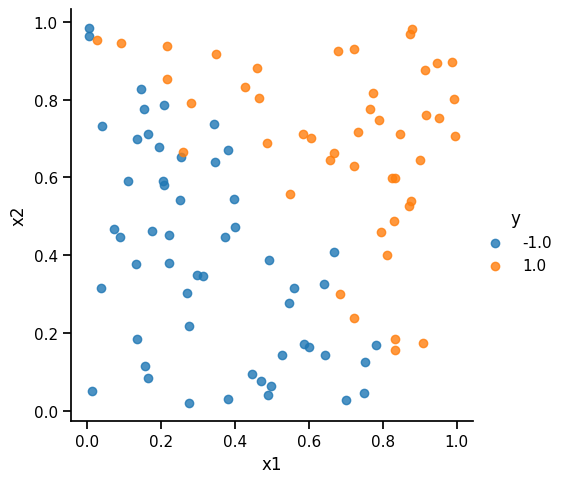

In [8]:
sns.lmplot(x="x1", y="x2", hue="y", data=dfA, fit_reg=False);

d:\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


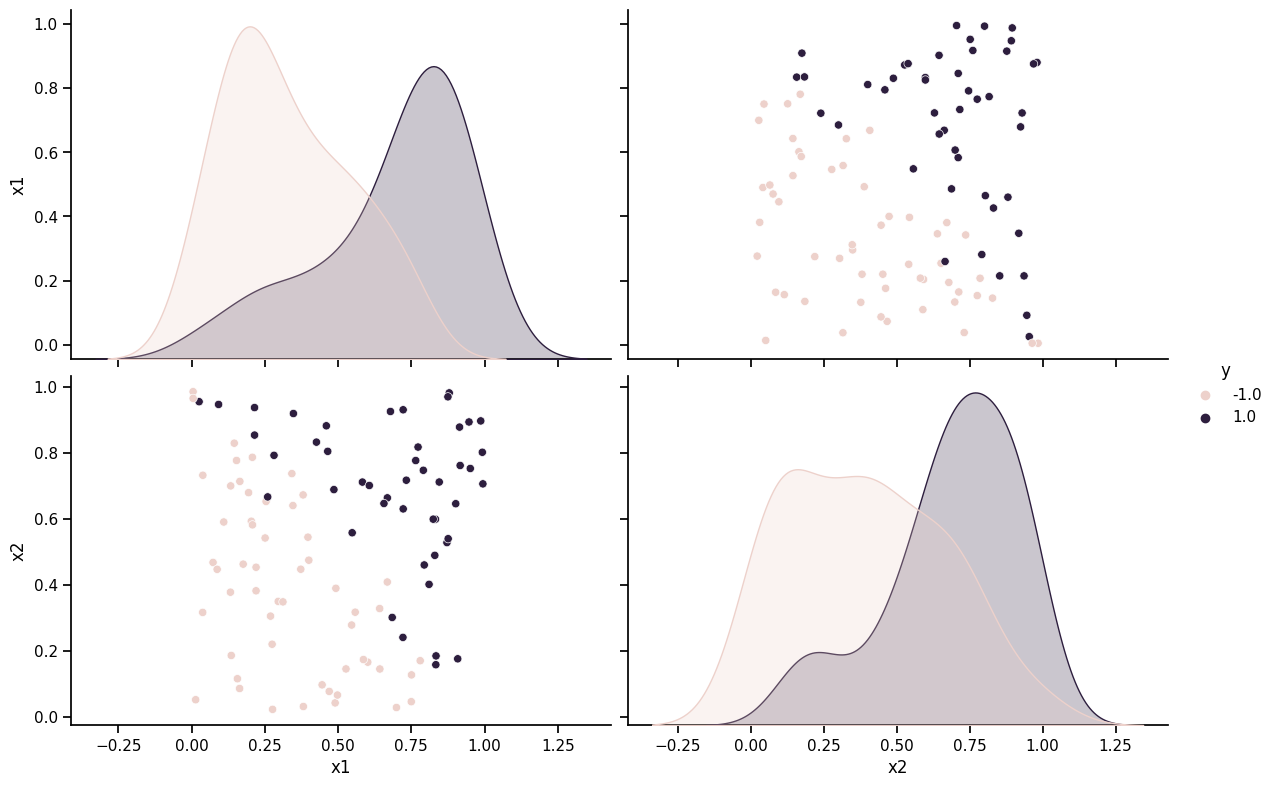

In [9]:
sns.pairplot(dfA,vars=["x1", "x2"], hue="y", size=4, aspect=1.5, diag_kind="kde");

d:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


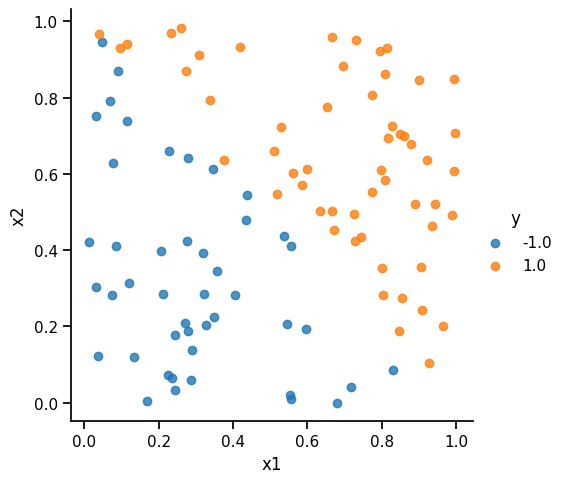

In [10]:
sns.lmplot(x="x1", y="x2", hue="y", data=dfB, fit_reg=False);

d:\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


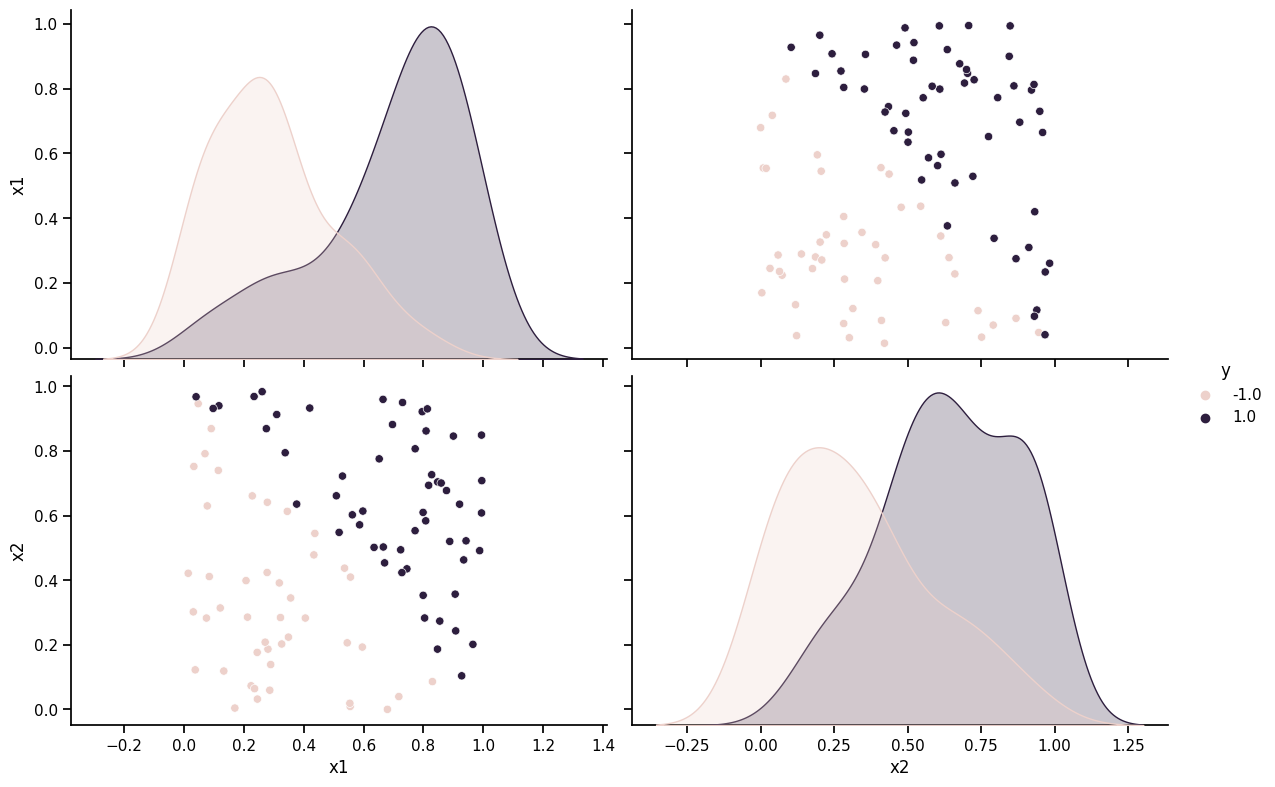

In [11]:
sns.pairplot(dfB,vars=["x1", "x2"], hue="y", size=4, aspect=1.5, diag_kind="kde");

### Question 1.b)

Let's rotate the datapoints by 45° and show a scatterplot, so we can see the boundaries more clearly:

d:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


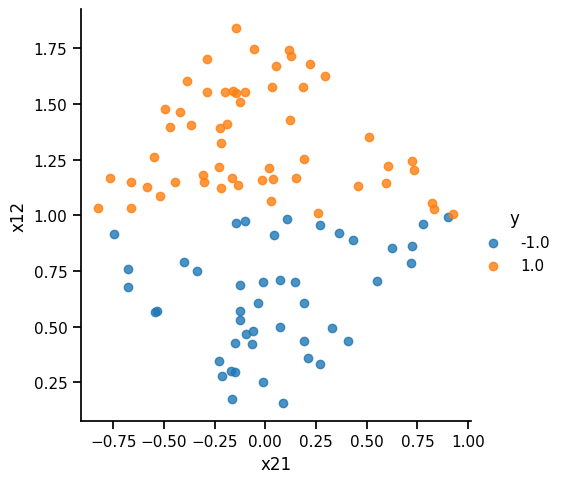

In [12]:
dfC = dfB.copy()
dfC['x12'] = dfC['x1']+dfC['x2']
dfC['x21'] = -dfC['x1']+dfC['x2']
sns.lmplot(x="x21", y="x12", hue="y", data=dfC, fit_reg=False);

It seems that the data is perfectly linearly separable in the case of dataset B, however this is not the case for dataset A.

Logistic regression attempts to maximize the log-likelihood:

$$
\ell (\theta) = \sum_{i=1}^m y^i h_{\theta}(x^i)+(1-y^i) (1-h_{\theta}(x^i))
$$

Where $h_{\theta}(x) = \frac{1}{1+\exp(-\theta^T x)}$ is the sigmoid function.

The problem is a scaling issue: Since the data is linearly separable, $||\theta||$ can be made arbitrarily large and this will increase the log-likelihood indefinitely, as $\forall i, h_{\theta} (x^i) \to 1 $ when $||\theta|| \to \infty$. This happens so long as $\theta$ describes a hyperplane that separates the data perfectly.

Another way of saying this is that $\nabla_{\theta} = X^T (Y-h_{\theta} (X))$ can be made arbitrarily close to $0$ by increasing $\theta$, so long as $\theta$ describes a hyperplane that separates the data perfectly.

This does not happen when the data is not linearly separable: in this case, the log-likelihood would start decreasing due to the misclassified data points, i.e. $\exists! \theta$ such that $X^T (Y-h_{\theta} (X)) = 0$

### Question 1.c)

- **Using a different constant learning rate**

This is a scaling issue, changing the learning rate would not solve the problem

- **Decreasing the learning rate over time**

Same as above: This is a scaling issue, changing the learning rate would not solve the problem

- **Adding a regularization term $||\theta||^2$ to the loss function**

This would solve the problem, as we would be actively penalizing large values of $\theta$ by including a term proportional to $||\theta||^2$ in the objective function.

- **Linear scaling of the input features**

This would not solve the problem, as any linear transformation would still keep the data linearly separable

- **Adding zero-mean Gaussian noise to the training data or labels**

This could work, as the data could be made to be linearly inseparable with the addition of noise. However, this is not a very robust solution as convergence of the algorithm depends on the set of noise samples: there is no guarantee the algorithm would converge *in general* for all possible sets of noise samples.



### Question 1.d)

Support Vector Machines maximize the geometric margin. In the case of a linearly separable dataset, an SVM would maximize the distance between the separator and the closest data point, such that all data points are correctly classified. An SVM would therefore be immune to datasets such as B, as geometric margin is independant of $||\theta||$.